### Импорт необходимых библиотек

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Загрузка файла

In [5]:
fandango = pd.read_csv('fandango_scrape.csv')
fandango.head()

,FILM,STARS,RATING,VOTES
0,Fifty Shades of Grey (2015),4.0,3.9,34846
1,Jurassic World (2015),4.5,4.5,34390
2,American Sniper (2015),5.0,4.8,34085
3,Furious 7 (2015),5.0,4.8,33538
4,Inside Out (2015),4.5,4.5,15749


# 1. Изучение донных о сайте Fandango

In [6]:
fandango.describe()

,STARS,RATING,VOTES
count,504.000000,504.000000,504.000000
mean,3.558532,3.375794,1147.863095
std,1.563133,1.491223,3830.583136
min,0.000000,0.000000,0.000000
25%,3.500000,3.100000,3.000000
50%,4.000000,3.800000,18.500000
75%,4.500000,4.300000,189.750000
max,5.000000,5.000000,34846.000000


### Связь между популярностью фильма и его рейтингом

<Axes: xlabel='RATING', ylabel='VOTES'>

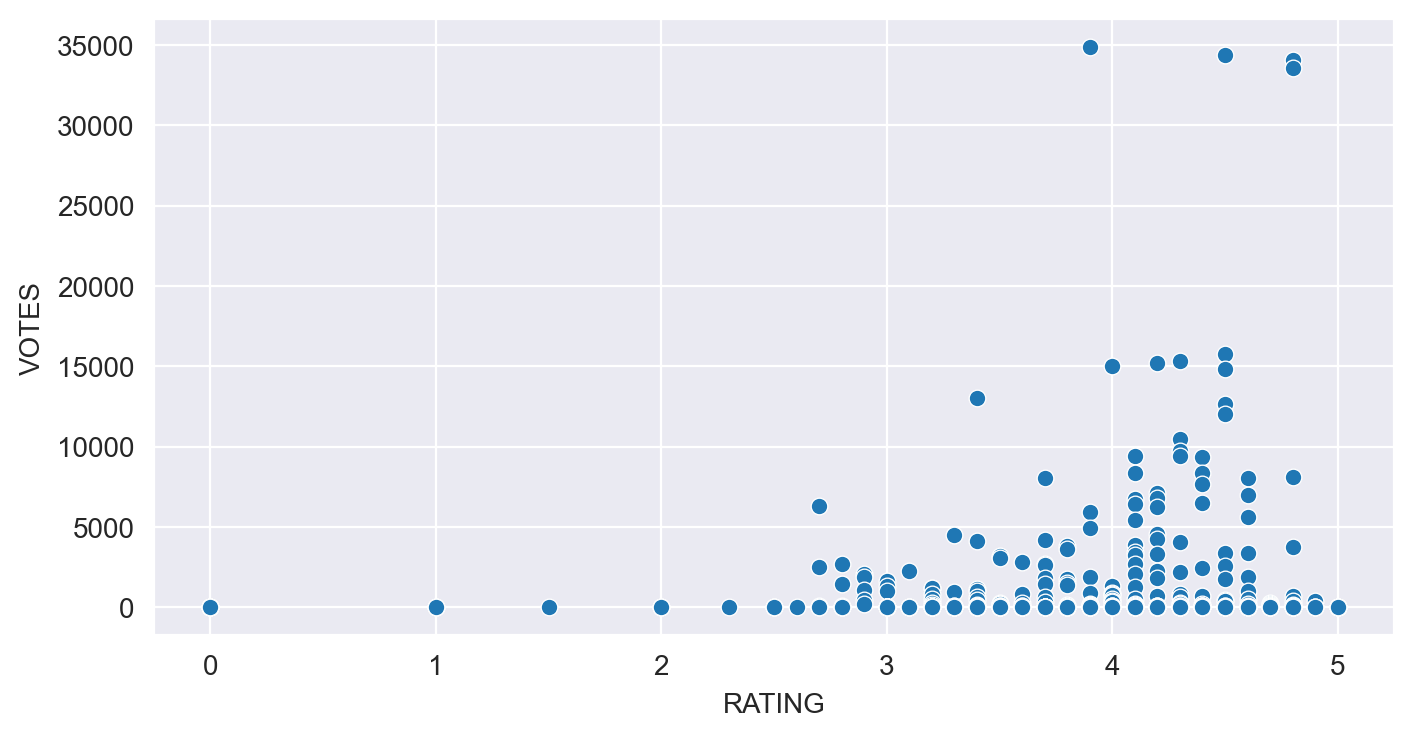

In [13]:
plt.figure(figsize=(8,4), dpi=200)
sns.scatterplot(data=fandango, x='RATING', y='VOTES')

### Корреляция данных

In [11]:
fandango.corr(numeric_only=True)

,STARS,RATING,VOTES
STARS,1.000000,0.994696,0.164218
RATING,0.994696,1.000000,0.163764
VOTES,0.164218,0.163764,1.000000


### Добавляем колонку YEAR

In [14]:
fandango['YEAR'] = fandango['FILM'].apply(lambda title: title.split('(')[-1].replace(')', ''))
fandango.head()

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015


### Разбивка фильмов по годам

In [16]:
fandango['YEAR'].value_counts()

YEAR
2015    478
2014     23
2016      1
1964      1
2012      1
Name: count, dtype: int64

<Axes: xlabel='YEAR', ylabel='count'>

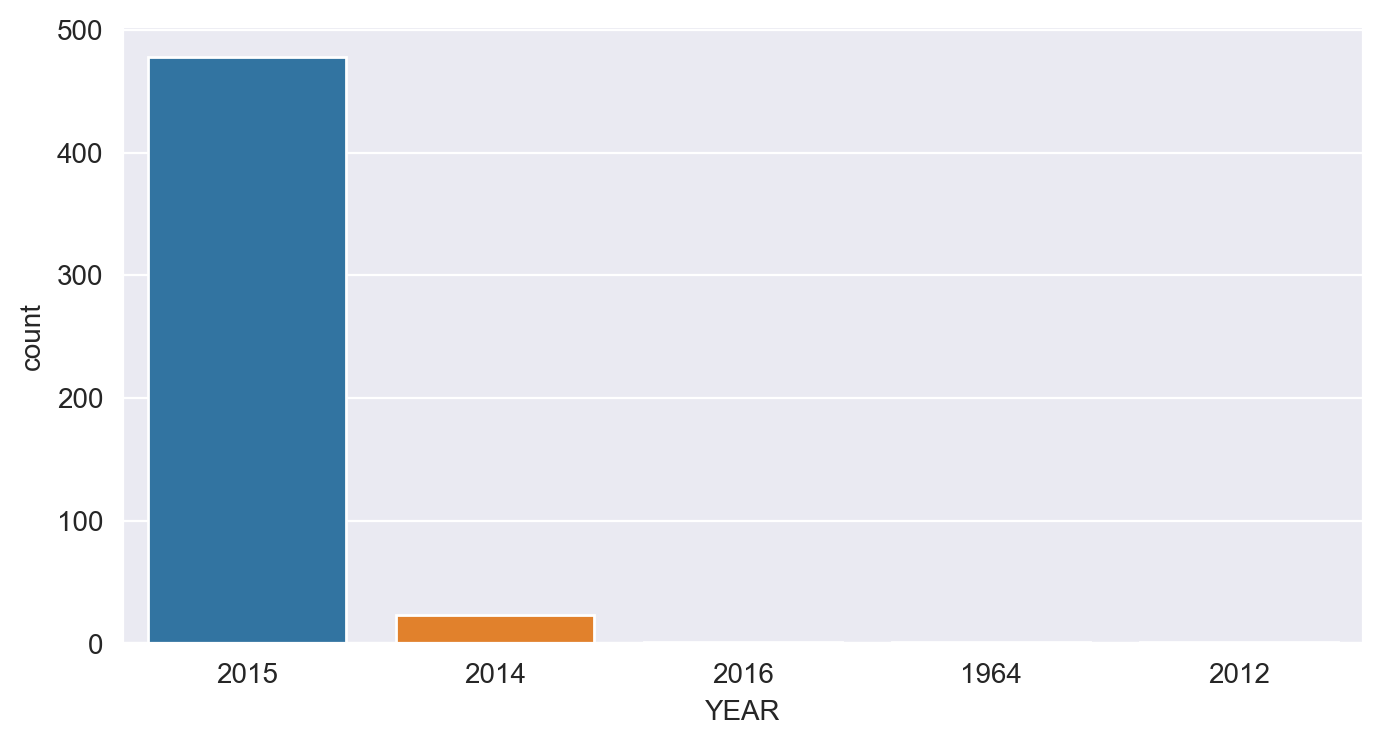

In [19]:
plt.figure(figsize=(8,4), dpi=200)
sns.countplot(data=fandango, x='YEAR', hue='YEAR')

### 10 фильмов с наибольшим количеством голосов

In [22]:
fandango.nlargest(10, 'VOTES')

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015
5,The Hobbit: The Battle of the Five Armies (2014),4.5,4.3,15337,2014
6,Kingsman: The Secret Service (2015),4.5,4.2,15205,2015
7,Minions (2015),4.0,4.0,14998,2015
8,Avengers: Age of Ultron (2015),5.0,4.5,14846,2015
9,Into the Woods (2014),3.5,3.4,13055,2014


### Количество фильмов без голосов

In [24]:
len(fandango[fandango['VOTES'] == 0])

69

### Удаление фильмов с нулевым количеством голосов

In [26]:
fan_reviewed = fandango[fandango['VOTES'] > 0]

### График KDE plot, который отображает распределение отображаемых рейтингов (STARS) и истинных рейтингов на основе голосов пользователей (RATING).

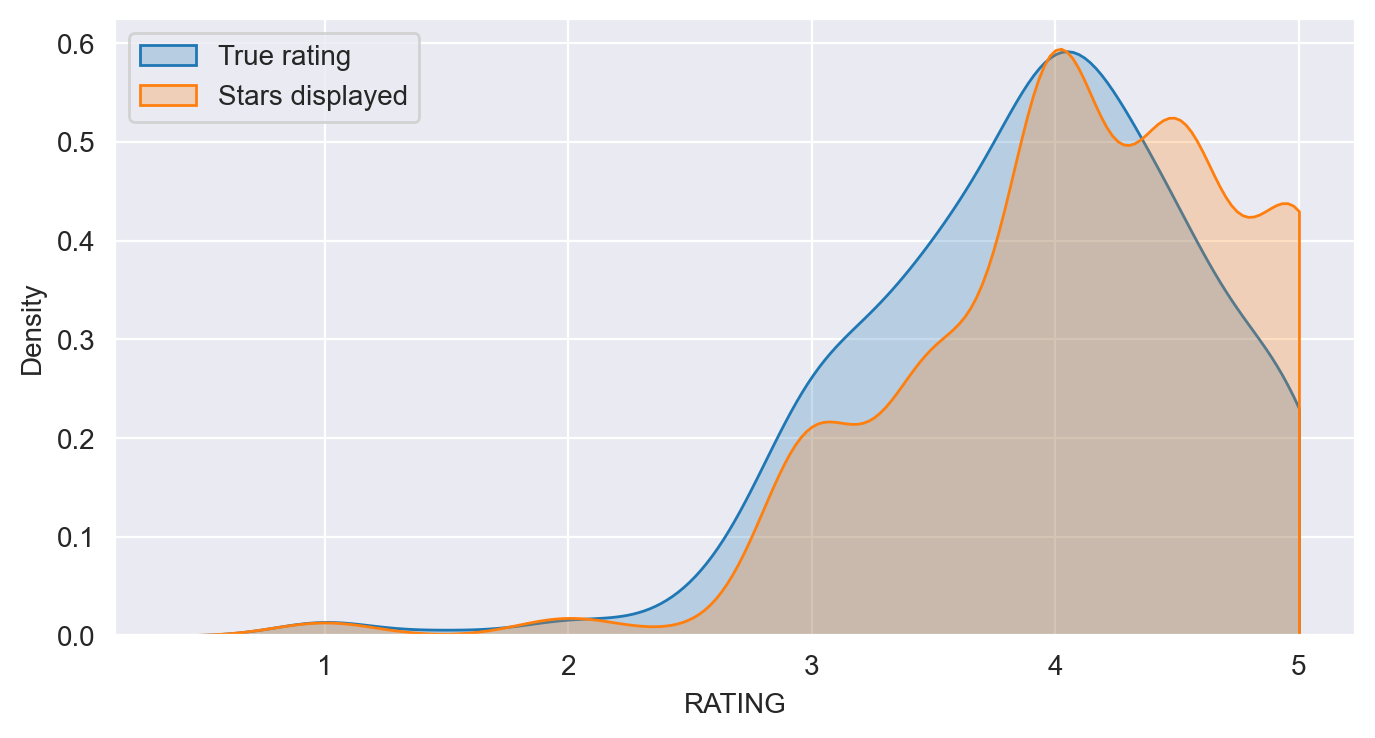

In [36]:
plt.figure(figsize=(8,4), dpi=200)
sns.kdeplot(data=fan_reviewed, x='RATING', fill=True, clip=[0, 5], label='True rating')
sns.kdeplot(data=fan_reviewed, x='STARS', fill=True, clip=[0, 5], label='Stars displayed')
plt.legend()

### Pазница в численном виде между колонками STARS и RATING

In [37]:
fan_reviewed['STARS_DIF'] = round(fan_reviewed['STARS'] - fandango['RATING'], 1)
fan_reviewed.head()

C:\Users\solo\AppData\Local\Temp\ipykernel_11328\2216292749.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fan_reviewed['STARS_DIF'] = round(fan_reviewed['STARS'] - fandango['RATING'], 1)


,FILM,STARS,RATING,VOTES,YEAR,STARS_DIF
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,0.1
1,Jurassic World (2015),4.5,4.5,34390,2015,0.0
2,American Sniper (2015),5.0,4.8,34085,2015,0.2
3,Furious 7 (2015),5.0,4.8,33538,2015,0.2
4,Inside Out (2015),4.5,4.5,15749,2015,0.0


<Axes: xlabel='STARS_DIF', ylabel='count'>

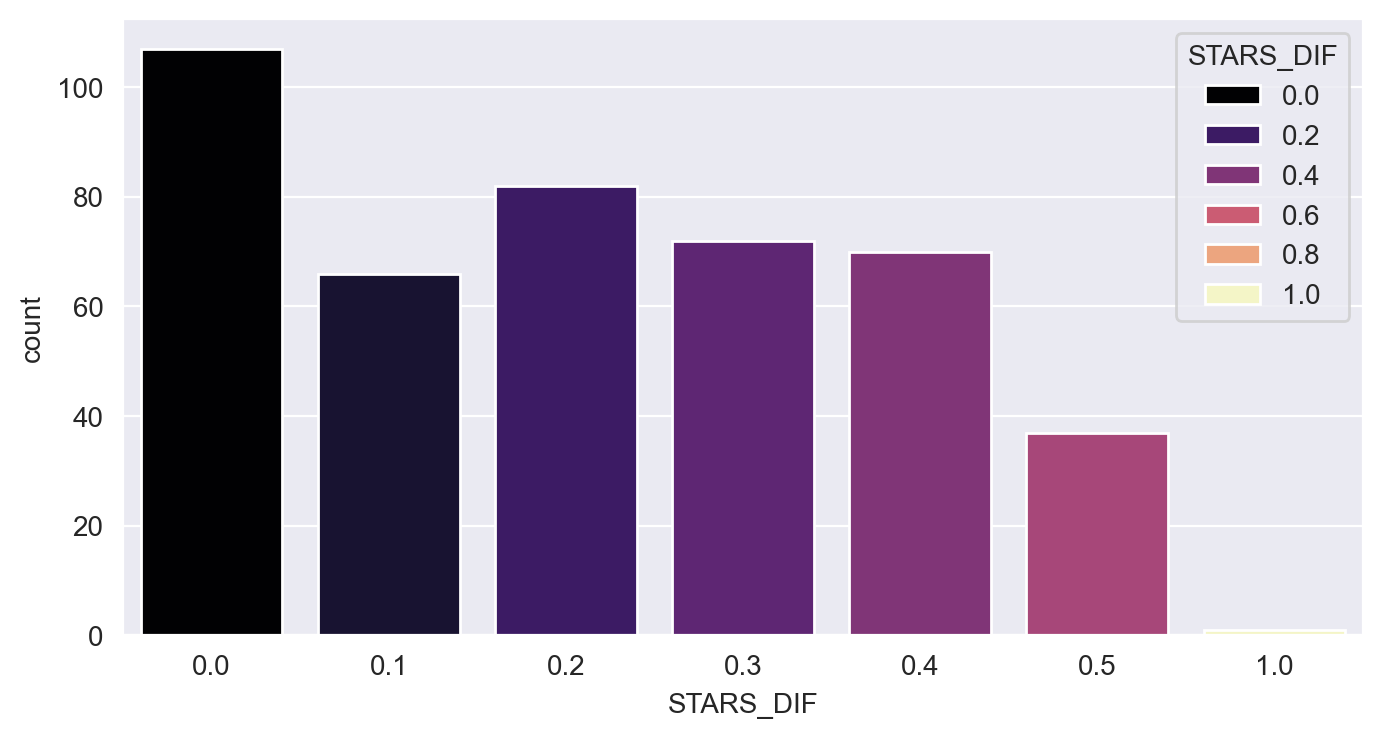

In [40]:
plt.figure(figsize=(8,4), dpi=200)
sns.countplot(data=fan_reviewed, x='STARS_DIF', hue='STARS_DIF', palette='magma')

### Фильм, в котором разница в рейтинге равна единице

In [42]:
fan_reviewed[fan_reviewed['STARS_DIF'] == 1]

,FILM,STARS,RATING,VOTES,YEAR,STARS_DIF
381,Turbo Kid (2015),5.0,4.0,2,2015,1.0


# 2. Сравнение рейтингов Fandango с рейтингами других компаний